<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'>
</center>

----------

<h1 align="center"> Pandas DataFrame 1 - Introduction </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>WeCloudData Academy </font></center>
<br>

----------

> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

> `pandas` is well suited for many different kinds of data:

> * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

<h2> References </h2>

* Pandas Reference Guide https://pandas.pydata.org/pandas-docs/stable/

<h2> Table of Contents </h2>

1. Introducting Pandas Objects
2. Reading and Viewing Data
3. Data Indexing and Selection
4. Operations on DataFrame

---
# <font color='#347B98'> 1 - Fundamental Pandas Data Structures: Series, DataFrame, and Index

At the very basic level, `Pandas objects` can be thought of as **two-dimensional matrix** in which the rows and columns are identified with **`labels`** rather than simple integer indices. Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are. Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the **`Series`**, **`DataFrame`**, and **`Index`**.

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

## $\Delta$ 1.1 - Pandas Series Object

A Pandas Series is a one-dimensional array of indexed data. It can be created from a list as follows:

In [2]:
import pandas as pd
from pandas import Series

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])

data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
type(data)

pandas.core.series.Series

As we see in the output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are NumPy array:

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a list, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [7]:
data[2]

0.75

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series as Python list

The essential difference between a Series and list is the presence of the index. While a list has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

We can even use non-contiguous or non-sequential indices:

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])

data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as Specialized Dictionary

We can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. The type-specific compiled code behind a Pandas Series makes it more efficient than a Python dictionary for certain operations.

In [11]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)

population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
population_dict

{'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135}

Unlike a dictionary, though, the Series also supports array-style operations such as slicing:

In [13]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series Object

> pd.Series(data, index=index)

For example, data can be a list, in which case index defaults to an integer sequence.

In [14]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Data can be a scalar, which is repeated to fill the specified index.

In [15]:
pd.Series(10, index=[100, 200, 300])

100    10
200    10
300    10
dtype: int64

If the data is a dictionary you can specify an index to select which keys to include in the series.

In [16]:
pd.Series({2:'a', 1:'b', 3:'c', 4:'d'}, index=[4, 3, 2])

4    d
3    c
2    a
dtype: object

### $\Delta$ Exercise 1.1 Creating Series

Question:

Create a Series from a dictionary that has integer 0 to 19 as index and random number between range [0, 1]. You should expect output like this:


**values**  
`[0.98000537  0.53676033  0.34231615  0.28810771  0.44019861  0.47648493  
  0.92837637  0.94332922  0.80151369  0.19528723  0.35994866  0.91016936  
  0.01509227  0.42555103  0.92382457  0.28921169  0.91818309  0.79261148  
  0.16085329  0.41213327]  `
  
**index**   
`Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')`

In [16]:
data_dict = {}

for i in range(20):
    data_dict[i] = random.random()

#Creating the sereis from the dictio
data_series = pd.Series(data_dict)

data_series      


0     0.679553
1     0.389096
2     0.277338
3     0.977377
4     0.973557
5     0.294427
6     0.006186
7     0.965945
8     0.115101
9     0.946388
10    0.641087
11    0.357031
12    0.753355
13    0.317341
14    0.728677
15    0.997094
16    0.098967
17    0.076535
18    0.500991
19    0.510264
dtype: float64

## $\Delta$ 1.2 - Pandas DataFrame Object

### DataFrame as multiple Series

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

#### Create two series

> the two series will be put into a dataframe later as two columns

In [3]:
# Create the population series from a dict

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)

population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [4]:
# Create the area series from a dict

area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}

area = pd.Series(area_dict)

area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

#### Use a dictionary to create a two-dimensional object

In [5]:
states = pd.DataFrame({'population': population,
                       'area': area})

states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the Series object, the DataFrame has an **`index`** attribute that gives access to the index labels as well as a **`columns`** attribute

In [7]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [21]:
states.columns

Index(['population', 'area'], dtype='object')

### DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [22]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [23]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [24]:
type(states['area'])

pandas.core.series.Series

### Constructing DataFrame objects

Earlier we say that a Pandas Dataframe can be created from a dictionary of Series. Here we'll show several other ways to construct a Dataframe.

#### Constructing a Dataframe from 2-D lists

In [25]:
data = [[3, 7],
        [1, 9],
        [5, 3]]

df = pd.DataFrame(data, columns=['foo', 'bar'], index=['a', 'b', 'c'])

df

,foo,bar
a,3,7
b,1,9
c,5,3


#### Constructing a Dataframe from a list of tuples

In [26]:
data = [(3, 7),
        (1, 9),
        (5, 3)]

df = pd.DataFrame(data, columns=['foo', 'bar'], index=['a', 'b', 'c'])

df

,foo,bar
a,3,7
b,1,9
c,5,3


#### Constructing a Dataframe from a dictionary of lists

In [27]:
data = {'foo': [3, 1, 5],
        'bar': [7, 9, 3]}

df = pd.DataFrame(data, index=['a', 'b', 'c'])

df

,foo,bar
a,3,7
b,1,9
c,5,3


#### Constructing a Dataframe from a list of dictionaries

In [28]:
data = [{'foo': 3, 'bar': 7},
        {'bar': 1, 'foo': 9},
        {'foo': 5, 'bar': 3}]

df = pd.DataFrame(data, index=['a', 'b', 'c'])

df

,foo,bar
a,3,7
b,9,1
c,5,3


### $\Delta$ Exercise 1.2 Creating DataFrames

`Question`: Create a **6x4** dimension dataframe using any method you'd like. Index will be dates from **2013-01-01 to 2013-01-06** and column names will be **['A', 'B', 'C', 'D']** and fill the dataframe with random number as values.

**hint:** You can use `pd.date_range`

##  $\Delta$ 1.3 Pandas Index Object

We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an **`immutable list`** or as an **`ordered set`** (technically a multi-set, as Index objects may contain repeated values). Those views have some interesting consequences in the operations available on Index objects. As a simple example, let's construct an Index from a list of integers:

In [29]:
ind = pd.Index([2, 3, 5, 7, 11])

ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as an immutable list

The Index in many ways operates like an list. For example, we can use standard Python indexing notation to retrieve values or slices:

In [30]:
ind[4]

11

In [31]:
ind[1:3]

Int64Index([3, 5], dtype='int64')

However, if you want to modify an index, you will get errors. One difference between Index objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [32]:
# ind[1] = 0

---

# <font color='#347B98'> 2 - Reading and Viewing Data

Pandas can read data from many different sources such as csv file, relational databases, data APIs etc. In this lecture, we will learn how to work with csv files.

## $\Delta$ 2.1 - Reading data from `csv` files

> `pd.read_csv(filepath, sep=',', encoding=None, index_col=None)  `

To get help on pd.read_csv(), refer to https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

### Read csv without specifying a separator

It's always a good habit to check out the separator in the raw data. Without providing a separator in the read_csv function, the entire line gets read into one column.

In [33]:
broken_df = pd.read_csv('https://weclouddata.s3.amazonaws.com/data/bikes.csv')

broken_df.head(3)

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


### Properly set the separator and encoding method

In [34]:
fixed_df = pd.read_csv('https://weclouddata.s3.amazonaws.com/data/bikes.csv',  sep=';', encoding='latin-1')

fixed_df.head(3)

,Date,Berri 1,Brï¿½beuf (donnï¿½es non disponibles),Cï¿½te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnï¿½es non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN


In [35]:
fixed_df = fixed_df.set_index(['Date'])

fixed_df.head(3)

,Berri 1,Brï¿½beuf (donnï¿½es non disponibles),Cï¿½te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnï¿½es non disponibles)
Date,,,,,,,,,
01/01/2012,35,NaN,0,38,51,26,10,16,NaN
02/01/2012,83,NaN,1,68,153,53,6,43,NaN
03/01/2012,135,NaN,2,104,248,89,3,58,NaN


### Visualize one column using plot()

<Axes: xlabel='Date'>

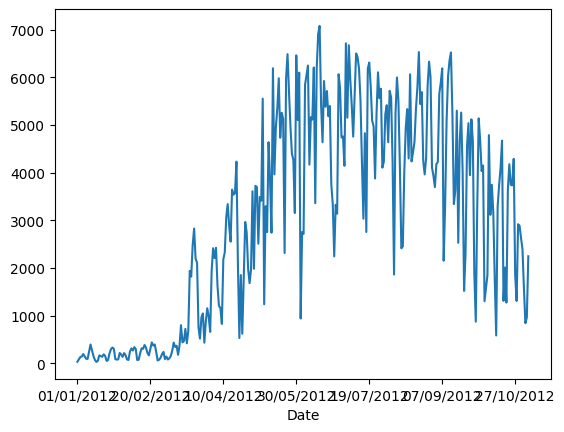

In [36]:
fixed_df['Berri 1'].plot()

#### Plot all the columns

<Axes: xlabel='Date'>

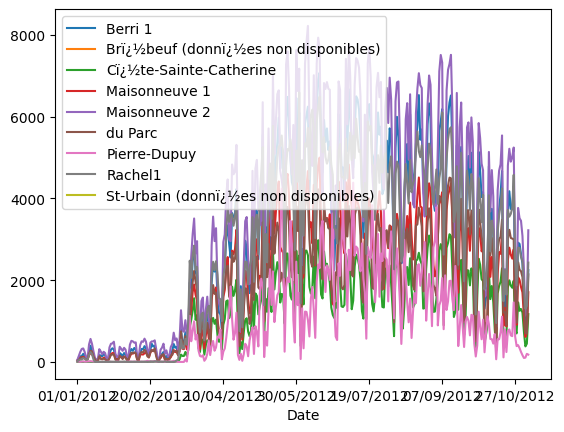

In [37]:
fixed_df.plot()

## $\Delta$ 2.2 - Exploring DataFrames  

### Load the 311 service requests data

In [38]:
complaints = pd.read_csv('https://weclouddata.s3.amazonaws.com/data/311-service-requests.csv')

complaints = complaints.set_index('Unique Key')

<ipython-input-38-8590421ed540>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('https://weclouddata.s3.amazonaws.com/data/311-service-requests.csv')


### Get the first n rows

In [39]:
complaints.head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


### Get the last n rows

In [40]:
complaints.tail(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016.0,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226.0,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236.0,1259 EAST 94 STREET,EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


### Get the index

In [41]:
complaints.index

Int64Index([26589651, 26593698, 26594139, 26595721, 26590930, 26592370,
            26595682, 26595195, 26590540, 26594392,
            ...
            26429040, 26434084, 26426164, 26439710, 26435569, 26426013,
            26428083, 26428987, 26426115, 26428033],
           dtype='int64', name='Unique Key', length=111069)

### Get the columns

In [42]:
complaints.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Lati

### Get Dataframe information

In [43]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111069 entries, 26589651 to 26428033
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    111069 non-null  object 
 1   Closed Date                     60270 non-null   object 
 2   Agency                          111069 non-null  object 
 3   Agency Name                     111069 non-null  object 
 4   Complaint Type                  111069 non-null  object 
 5   Descriptor                      110613 non-null  object 
 6   Location Type                   79022 non-null   object 
 7   Incident Zip                    98807 non-null   object 
 8   Incident Address                84441 non-null   object 
 9   Street Name                     84432 non-null   object 
 10  Cross Street 1                  84728 non-null   object 
 11  Cross Street 2                  84005 non-null   object 
 12  Interse

### Summary statistics

In [44]:
complaints.describe()

,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


### Get value counts of a column

In [45]:
complaints['Complaint Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

### Sort a DataFrame by Index

In [46]:
complaints.sort_index(ascending=False).head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26596133,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,10458.0,2464 BEAUMONT AVENUE,BEAUMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855767,-73.883492,"(40.85576714974678, -73.88349179637943)"
26596132,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,11210.0,2501 NOSTRAND AVENUE,NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623528,-73.946250,"(40.62352798084708, -73.94624978072031)"
26596131,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10475.0,3403 BOLLER AVENUE,BOLLER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.880235,-73.835035,"(40.88023467959374, -73.8350347892652)"


### Sort a DataFrame by columns

In [47]:
complaints.sort_values(by=['Created Date'], ascending=False).head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310.0,173 CAMPBELL AVENUE,CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
26595117,10/31/2013 12:52:46 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11236.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632437,-73.888173,"(40.63243692394328, -73.88817263437012)"
26590389,10/31/2013 12:51:00 AM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,226 42 ST E,42 ST E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort by multiple columns

In [48]:
complaints.sort_values(by=['Location Type','Created Date'], ascending=[True, False]).head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
26590905,10/30/2013 12:10:39 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11103.0,33-10 24 AVENUE,24 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771438,-73.914204,"(40.771437791236906, -73.91420432590131)"
26595845,10/30/2013 12:07:21 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,1-2 Family Dwelling,11418.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693727,-73.844703,"(40.69372683792426, -73.84470267561183)"
26582534,10/30/2013 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10304.0,118 SEAVIEW AVENUE,SEAVIEW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589258,-74.097501,"(40.58925785461915, -74.09750078255374)"
26591881,10/30/2013 11:03:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Asbestos,NaN,1-2 Family Dwelling,10460.0,1831 WATERLOO PLACE,WATERLOO PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840480,-73.887519,"(40.84048038252795, -73.88751934468769)"
26590698,10/30/2013 10:24:32 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10026.0,321 WEST 116 STREET,WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.804697,-73.956004,"(40.804697298436864, -73.95600431980877)"


---

# <font color='#347B98'> 3 - Data Indexing and Selection

The corresponding patterns in Pandas are similar to Python data structures, though there are a few quirks to be aware of.
We'll start with the simple case of the one-dimensional Series object, and then move on to the more complicated two-dimesnional DataFrame object.

## $\Delta$ 3.1 Data Selection in Series

As we saw in the previous section, a Series object acts in many ways like a Python list, and in many ways like a Python dictionary. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as a dictionary

Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values:

In [49]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [50]:
data['b']

0.5

In [51]:
'a' in data

True

In [52]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [53]:
data.index == data.keys()

array([ True,  True,  True,  True])

### Series as a list

A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as  a list, like slicing and indexing. Examples of these are as follows:

In [54]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [55]:
data[0:2]

a    0.25
b    0.50
dtype: float64

## $\Delta$ 3.2 Data Selection in DataFrame

Pandas support several ways to access and select data in a DataFrame. Commonly used methods are:
`
* Selection by index (dictionary-style)
* Selection by label (array-style via loc)
* Selection by position (array-style via iloc)

In [56]:
area = pd.Series({'California': 423967,
                  'Texas': 695662,
                  'New York': 141297,
                  'Florida': 170312,
                  'Illinois': 149995})

pop = pd.Series({'California': 38332521,
                 'Texas': 26448193,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})

data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


### 3.2.1 - Selection by Index (DataFrame as dictionary)

In [57]:
# Stick to this syntax
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [58]:
# Avoid this if possible
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Selecting multiple columns

In [59]:
type(data['area'])

pandas.core.series.Series

In [60]:
data[['area', 'pop']]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### Turning a column series back to a dataframe

In [61]:
pd.DataFrame(data['area'], columns=['area'])

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [62]:
# select one column as Dataframe instead of series
data[['area']]

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


#### Adding a new column to a dataframe

In [63]:
data['density'] = data['pop'] / data['area']

data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### 3.2.2 - Selection by Label (array-style)

> **`loc`** works on labels in the index.  
> **`iloc`** works on the positions in the index (so it only takes integers).  

#### Slicing rows and columns with `loc`

In [64]:
data.loc['New York':'Illinois', 'pop']

New York    19651127
Florida     19552860
Illinois    12882135
Name: pop, dtype: int64

In [65]:
data.loc['New York', 'pop']

19651127

In [66]:
data.loc[:, ['pop', 'area']]

,pop,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### Selecting multiple columns with row slicing

In [67]:
data.loc['New York':'Illinois', ['area', 'density']]

,area,density
New York,141297,139.076746
Florida,170312,114.806121
Illinois,149995,85.883763


### 3.2.3 - Selection by Position (array-style)

#### Select rows by position

In [68]:
data.iloc[0]

area       4.239670e+05
pop        3.833252e+07
density    9.041393e+01
Name: California, dtype: float64

In [69]:
data.iloc[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


#### Slicing both rows and columns with iloc

In [70]:
data.iloc[2:4, 1:3]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


### 3.2.4 - Boolean Indexing and Row Filtering

In [71]:
data[data['density'] > 90]

,area,pop,density
California,423967,38332521,90.413926
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [72]:
data[data['area'] == 170312]

,area,pop,density
Florida,170312,19552860,114.806121


#### Filtering on multiple columns

In [73]:
pop_f = data['pop'] > 15000000

density_f = data['density'] > 95

In [74]:
data[pop_f & density_f]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


### $\Delta$ Lab - Data Selection and Indexing

Questions:

1. Get 10 most common complaint type from 311 complaint dataset
2. Select complaint type in the first 5 rows - dictionary style
3. Select Complaint Type and Descriptor columns for case "26595721" (unique key)
4. What is the most common 'Location Type' for complaints about 'Rodent'?
5. Select NY boroughs with most `Noise - Street/Sidewalk` complaints
6. Normalize the 'borough' noise complaint count in NY 'Borough' by the total noise counts in each borough and plot on a bar chart
7. Select all rows with 'Noise - Street/Sidewalk' complaint type in borough 'BROOKLYN'

---

# <font color='#347B98'> 4 - Basic Operations

## 4.1 - Simple Statistics

- `count()` -	Number of non-null observations
- `sum()` - Sum of values
- `mean()` - Mean of values
- `median()` - Arithmetic median of values
- `min()` - Minimum
- `max()` - Maximum
- `std()` - Bessel-corrected sample standard deviation
- `var()` - Unbiased variance
- `skew()` - Sample skewness (3rd moment)
- `kurt()` - Sample kurtosis (4th moment)
- `quantile()` - Sample quantile (value at %)
- `apply()` - Generic apply
- `cov()` - Unbiased covariance (binary)
- `corr()` - Correlation (binary)

In [75]:
data['area'].mean()

316246.6

In [76]:
data.mean()

area       3.162466e+05
pop        2.337337e+07
density    9.363986e+01
dtype: float64

In [77]:
data.mean(axis=1)

California    1.291886e+07
Texas         9.047964e+06
New York      6.597521e+06
Florida       6.574429e+06
Illinois      4.344072e+06
dtype: float64

In [78]:
data.mean(axis='rows')

area       3.162466e+05
pop        2.337337e+07
density    9.363986e+01
dtype: float64

In [79]:
data.mean(axis='columns')

California    1.291886e+07
Texas         9.047964e+06
New York      6.597521e+06
Florida       6.574429e+06
Illinois      4.344072e+06
dtype: float64

## 4.2 Applying functions to DF columns

In [80]:
data['pop'].apply(lambda x: f'{x:,}')

California    38,332,521
Texas         26,448,193
New York      19,651,127
Florida       19,552,860
Illinois      12,882,135
Name: pop, dtype: object

### $\Delta$ Exercise

Questions:

1. Find zip areas with highest number of complaints
2. Use python regex to replace all "STREET" to "ST" in column 'Incident Address'